In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot



from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler  
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier


#libraries for models
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#acurancy metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [2]:
#Uplading of file
red=pd.read_csv('winequality_red.csv', sep=";", header=0)

In [3]:
#creating column good quality wine for solving binary classification
red['Qgood']= red['quality'].apply(lambda x: 0 if (x!=8 and x!=7 ) else 1)
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Qgood
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Qgood
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


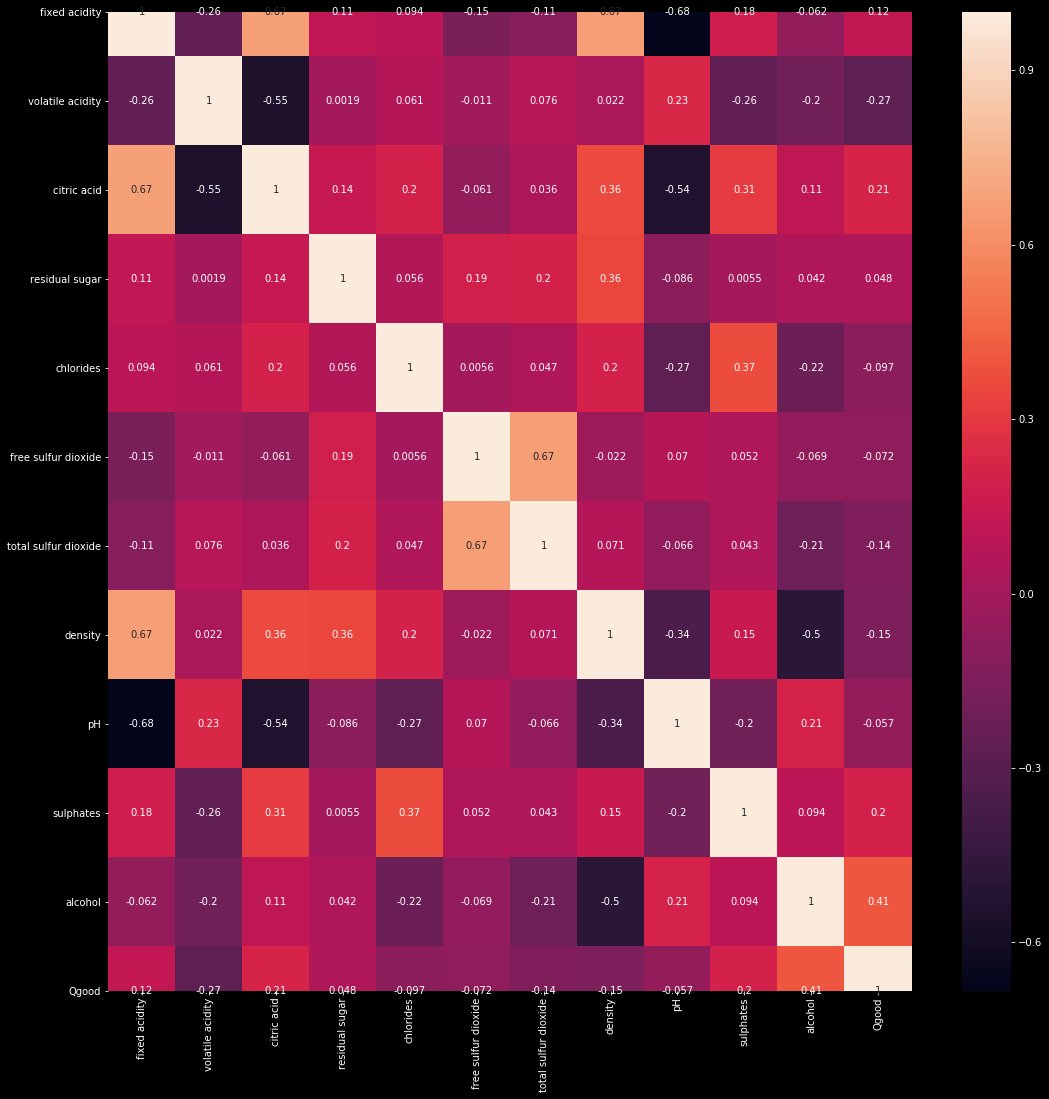

In [4]:
#visualasing dependency between variables and result
corRed=red.iloc[:,red.columns!='quality']
corr=corRed.corr()
fig = plt.figure(figsize=(18,18))
#corr_features = corr.index

g=sns.heatmap(corr,annot=True)
corr

#### Uplading variable and using scaleing

In [5]:
#Uploading variable and using scaleing
X=red.iloc[:,0:11]
y=red['Qgood']

#Split data
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)

#scaleing
scaler=MinMaxScaler().fit(X_train)

xTrainScaled=scaler.transform(X_train)
xTestScaled=scaler.transform(X_test)

#### Using different model for binary classification

k_nearest Neighbors classifier

K_nearest Neighbour classifier on Train_scaled_data with 3_neighbors:0.926605504587156
K_nearest Neighbour classifier on Test_scaled_data with 3_neighbors:0.8875
K_nearest Neighbour classifier with 3_neighbors:
[[331  24]
 [ 21  24]]
K_nearest Neighbour classifier on Train_scaled_data with 5_neighbors:0.9107589658048374
K_nearest Neighbour classifier on Test_scaled_data with 5_neighbors:0.865
K_nearest Neighbour classifier with 5_neighbors:
[[326  29]
 [ 25  20]]
K_nearest Neighbour classifier on Train_scaled_data with 10_neighbors:0.8882402001668057
K_nearest Neighbour classifier on Test_scaled_data with 10_neighbors:0.8725
K_nearest Neighbour classifier with 10_neighbors:
[[336  19]
 [ 32  13]]
K_nearest Neighbour classifier on Train_scaled_data with 15_neighbors:0.8807339449541285
K_nearest Neighbour classifier on Test_scaled_data with 15_neighbors:0.8825
K_nearest Neighbour classifier with 15_neighbors:
[[335  20]
 [ 27  18]]
K_nearest Neighbour classifier on Train_scaled_data with

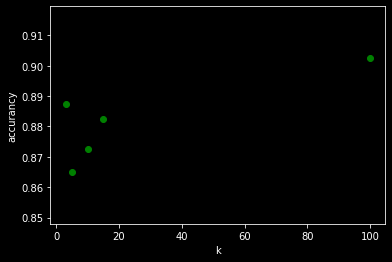

In [6]:
#k_nearest Neighbors classifier
a=[3,5,10,15,100]
scores=[]

for i in a: 
    knnc=KNeighborsClassifier(n_neighbors=i).fit(xTrainScaled,y_train)
    yKnncPred=knnc.predict(xTestScaled)
    scores.append(knnc.score(xTestScaled,y_test))

    print('K_nearest Neighbour classifier on Train_scaled_data with {}_neighbors:{}'.format(i,knnc.score(xTrainScaled,y_train)))
    print('K_nearest Neighbour classifier on Test_scaled_data with {}_neighbors:{}'.format(i,knnc.score(xTestScaled,y_test)))

    #confusion matrix
    print('K_nearest Neighbour classifier with {}_neighbors:\n{}'.format(i,confusion_matrix(y_test,yKnncPred)))

#visualise results of k_neares NeighobrsClassifier in dependency of  
print(scores)
plt.figure()
plt.xlabel('k')
plt.ylabel('accurancy')
plt.scatter(a,scores,c='green')
#plt.show

#### logistic regresion (binary classification)

In [7]:
cl=LogisticRegression(random_state=0,solver='lbfgs').fit(xTrainScaled,y_train)
yClPred=cl.predict(xTestScaled)

print('Logistic regresion intercept:{}'.format(cl.intercept_))
print('Logistic regresion coeficient {}'.format(cl.coef_))
print('Logistic regresion score on TrainScaled Data:{}'.format(cl.score(xTrainScaled,y_train)))
print('Logistic regresion core on TestScaled Data:{}'.format(cl.score(xTestScaled,y_test)))

#confusion matrix
print('Logistic regresion confusion matrix:\n{}'.format(confusion_matrix(y_test,yClPred)))


Logistic regresion intercept:[-2.8265658]
Logistic regresion coeficient [[ 1.17494026 -3.09174407  1.28703711  0.97793371 -1.39051655 -0.22322382
  -1.46030073 -1.74407635  0.22514264  2.68627682  4.15589804]]
Logistic regresion score on TrainScaled Data:0.8698915763135947
Logistic regresion core on TestScaled Data:0.8975
Logistic regresion confusion matrix:
[[349   6]
 [ 35  10]]


#### Decision Tree classifier:

In [8]:
clTree=tree.DecisionTreeClassifier().fit(xTrainScaled, y_train)
yClTreePred=clTree.predict(xTestScaled)


print('Decision tree score on TrainScaled Data:{}'.format(clTree.score(xTrainScaled,y_train)))
print('Decision tree core on TestScaled Data:{}'.format(clTree.score(xTestScaled,y_test)))

#confusion matrix
print('Decision tree confusion matrix:\n{}'.format(confusion_matrix(y_test,yClTreePred)))

Decision tree score on TrainScaled Data:1.0
Decision tree core on TestScaled Data:0.9025
Decision tree confusion matrix:
[[328  27]
 [ 12  33]]


#### Linear suport vector machine classifier:

In [9]:
gamma=[0.01,1.0, 10.0]

#using different gamma
for l in gamma:
    clSVM=SVC(kernel='rbf', gamma=l).fit(xTrainScaled,y_train)
    yClSvm=clSVM.predict(xTestScaled)

    print('Support Vector machine score on TrainScaled Data with gamma:{}\n{}'.format(l,clSVM.score(xTrainScaled,y_train)))
    print('Support Vector machine core on TestScaled Data with gamma:{}\n{}'.format(l,clSVM.score(xTestScaled,y_test)))

    #confusion matrix
    print('Support Vector machine confusion matrix with gamma:{}\n{}'.format(l,confusion_matrix(y_test,yClSvm)))



Support Vector machine score on TrainScaled Data with gamma:0.01
0.8565471226021685
Support Vector machine core on TestScaled Data with gamma:0.01
0.8875
Support Vector machine confusion matrix with gamma:0.01
[[355   0]
 [ 45   0]]
Support Vector machine score on TrainScaled Data with gamma:1.0
0.8582151793160967
Support Vector machine core on TestScaled Data with gamma:1.0
0.8875
Support Vector machine confusion matrix with gamma:1.0
[[355   0]
 [ 45   0]]
Support Vector machine score on TrainScaled Data with gamma:10.0
0.9099249374478732
Support Vector machine core on TestScaled Data with gamma:10.0
0.9125
Support Vector machine confusion matrix with gamma:10.0
[[347   8]
 [ 27  18]]


#### Dummy Classifier

In [10]:
dummy_majority=DummyClassifier(strategy='most_frequent').fit(xTrainScaled,y_train)
y_dummy_predictions=dummy_majority.predict(xTestScaled)

print(dummy_majority.score(xTrainScaled,y_train))

#confusion matrix
print('Dummy classifier confusion matrix:\n{}'.format(confusion_matrix(y_test,y_dummy_predictions)))

0.8565471226021685
Dummy classifier confusion matrix:
[[355   0]
 [ 45   0]]


##### Evaluation matrics and calssification _report

In [11]:
print('Accuracy:{:.3f}'.format(accuracy_score(y_test,yClPred)))
print('Recall:{:.3f}'.format(recall_score(y_test,yClPred)))
print('F_1 score:{:.3f}'.format(f1_score(y_test,yClPred)))

print(classification_report(y_test,yClPred,target_names=['class 0','class 1']))


Accuracy:0.897
Recall:0.222
F_1 score:0.328
              precision    recall  f1-score   support

     class 0       0.91      0.98      0.94       355
     class 1       0.62      0.22      0.33        45

    accuracy                           0.90       400
   macro avg       0.77      0.60      0.64       400
weighted avg       0.88      0.90      0.88       400



#### looking for bad predictions

In [12]:
y_score_cl=cl.decision_function(xTestScaled)
y_proba_cl=cl.predict_proba(xTestScaled)
yScoreList=list(zip(y_test[0:20],y_score_cl[0:20]))
yProbaList=list(zip(y_test[0:20],y_proba_cl[0:20,1]))
#print(yScoreList)   
print(yProbaList)

[(0, 0.13680491590202506), (0, 0.019299490795103336), (1, 0.4593835889348402), (0, 0.054877704919796634), (0, 0.2099497343715948), (0, 0.02343317892677879), (0, 0.053081568011777984), (0, 0.2056458364545435), (0, 0.016891528576824553), (0, 0.01906369759270707), (0, 0.05312771112377116), (0, 0.05118730556275253), (0, 0.11650399131037496), (0, 0.05251500975722104), (0, 0.060917001924305), (0, 0.3502401254113337), (1, 0.6701585212314679), (0, 0.13866338880179516), (0, 0.20361692463060937), (0, 0.023323406369004193)]
